# Regression Project HW - Bank Authentication Dataset
## Mohamed R Helayhel
1. Define the Research problem and questions
2. Analyze data by descriptive statistics and graphical visualization.
3. Prepare data by using relevant preprocessing transformations, data cleaning, 
    data standardization,deaing with null and outlier values. Divide data into test and training set.
4. Fit the train data and predict test Data for the First Model and Build Confusion Matrix
5. Performance Improvement Techniques
6. Choose the best model and discuss the results.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import scipy.stats as stat
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1-Define the Research problem and questions
The Dataset was retrieved from UCI Machine Learning Repository (Link: https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

### Description
#### Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

### Question to answer
##### Use the four attributes: Variance, skewness, curtosis and entropy to determine the class (authenticity) of the banknotes. The Labels are 0 as authentic, 1 is counterfeit based on the information available on the web.


In [2]:
# Read the data, print the shape and first 5 rows.
bankNoteAuth = pd.read_csv("data_banknote_authentication.txt")
bankNoteAuth.columns=["variance","skewness","curtosis","entropy","class"]
print(bankNoteAuth.shape)
print(bankNoteAuth.head())

(1371, 5)
   variance  skewness  curtosis  entropy  class
0   4.54590    8.1674   -2.4586 -1.46210      0
1   3.86600   -2.6383    1.9242  0.10645      0
2   3.45660    9.5228   -4.0112 -3.59440      0
3   0.32924   -4.4552    4.5718 -0.98880      0
4   4.36840    9.6718   -3.9606 -3.16250      0


## 2-Analyze data by descriptive statistics and graphical visualization.

In [3]:
# Print the summary of the data

print(bankNoteAuth.describe())
print(bankNoteAuth.describe().T)

          variance     skewness     curtosis      entropy        class
count  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000
mean      0.431410     1.917434     1.400694    -1.192200     0.444931
std       2.842494     5.868359     4.310105     2.101683     0.497139
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.774700    -1.711300    -1.553350    -2.417000     0.000000
50%       0.495710     2.313400     0.616630    -0.586650     0.000000
75%       2.814650     6.813100     3.181600     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
           count      mean       std      min      25%      50%      75%  \
variance  1371.0  0.431410  2.842494  -7.0421 -1.77470  0.49571  2.81465   
skewness  1371.0  1.917434  5.868359 -13.7731 -1.71130  2.31340  6.81310   
curtosis  1371.0  1.400694  4.310105  -5.2861 -1.55335  0.61663  3.18160   
entropy   1371.0 -1.192200  2.101683  -8.5482 -2.41700 -0

In [4]:
# Print the datatypes which are keys.
types = bankNoteAuth.dtypes
print(types)
print("Keys of bank Note Authentication dataset:\n", bankNoteAuth.keys())

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object
Keys of bank Note Authentication dataset:
 Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')


In [5]:
# print the target variable
# Labels: 0 as authentic, 1 is counterfeit.
print("class:", bankNoteAuth['class'])

class: 0       0
1       0
2       0
3       0
4       0
       ..
1366    1
1367    1
1368    1
1369    1
1370    1
Name: class, Length: 1371, dtype: int64


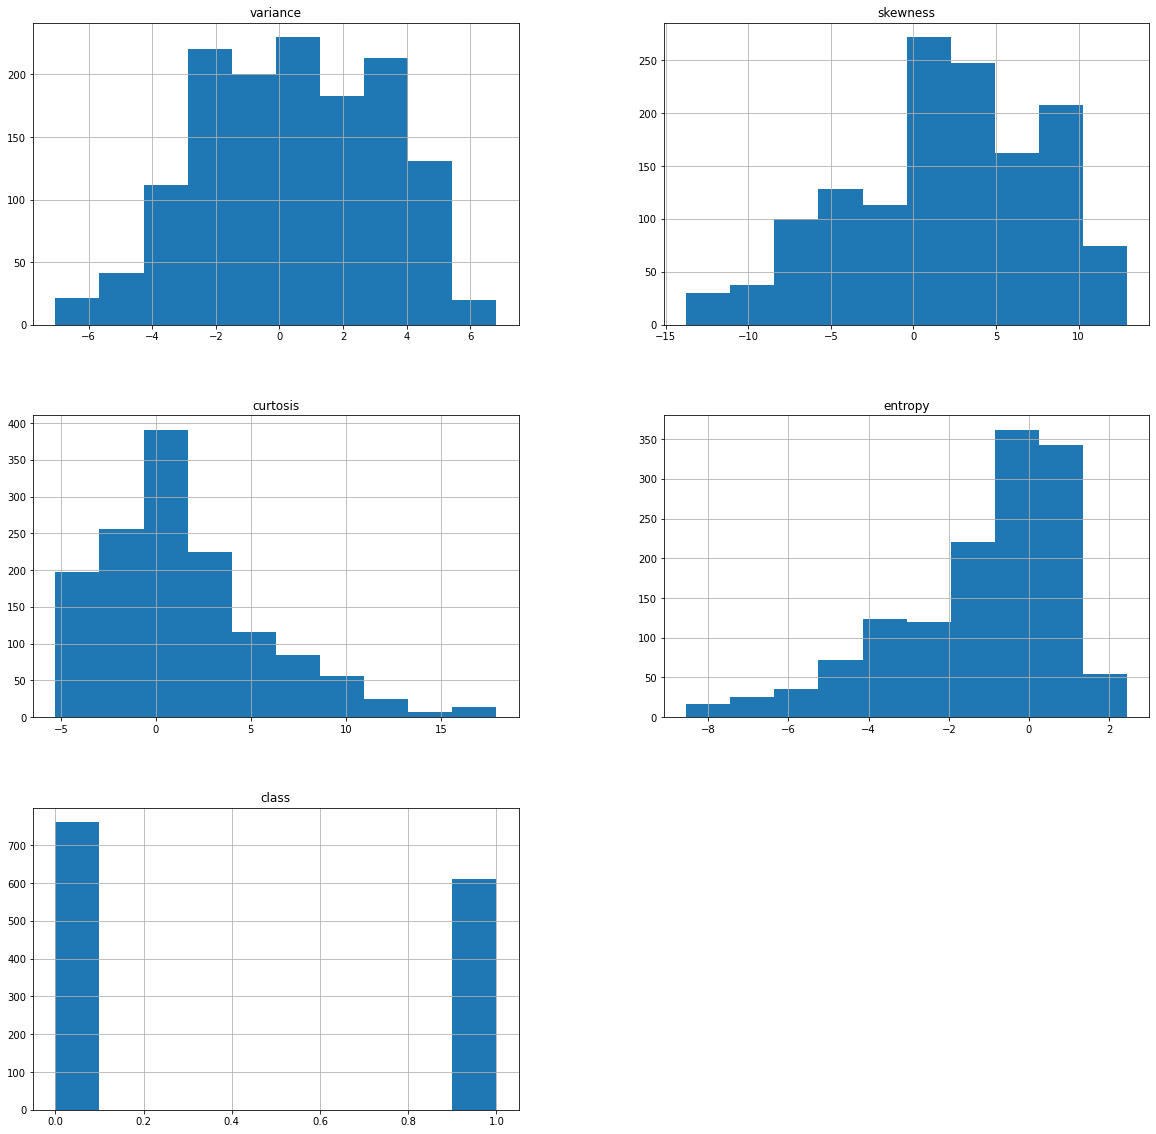

In [6]:
# Create the histogram of all the variables.

%matplotlib inline
bankNoteAuth.hist(figsize = (20,20))
plt.show()

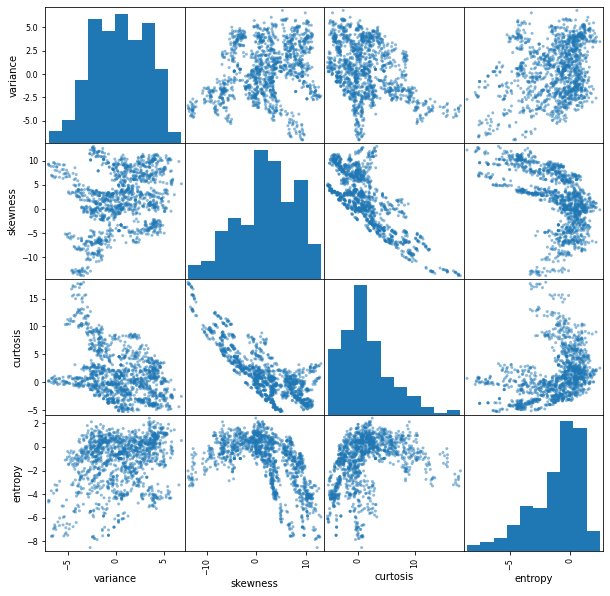

In [7]:
# create a grid of scatterplot and histogram

%matplotlib inline
X = bankNoteAuth[['variance', 'skewness', 'curtosis', 'entropy']] 
y = bankNoteAuth[['class']]
from pandas.plotting import scatter_matrix
scatter_matrix(X,figsize=(10, 10))
plt.show() 

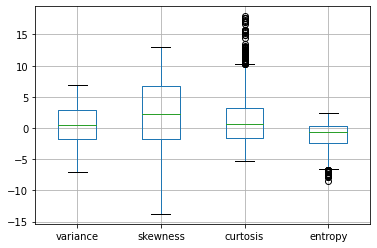

In [8]:
# create a grid of boxplot
%matplotlib inline
X = bankNoteAuth[['variance', 'skewness', 'curtosis', 'entropy']] 
y = bankNoteAuth[['class']]

boxplot = bankNoteAuth.boxplot(column=['variance', 'skewness', 'curtosis', 'entropy'])  


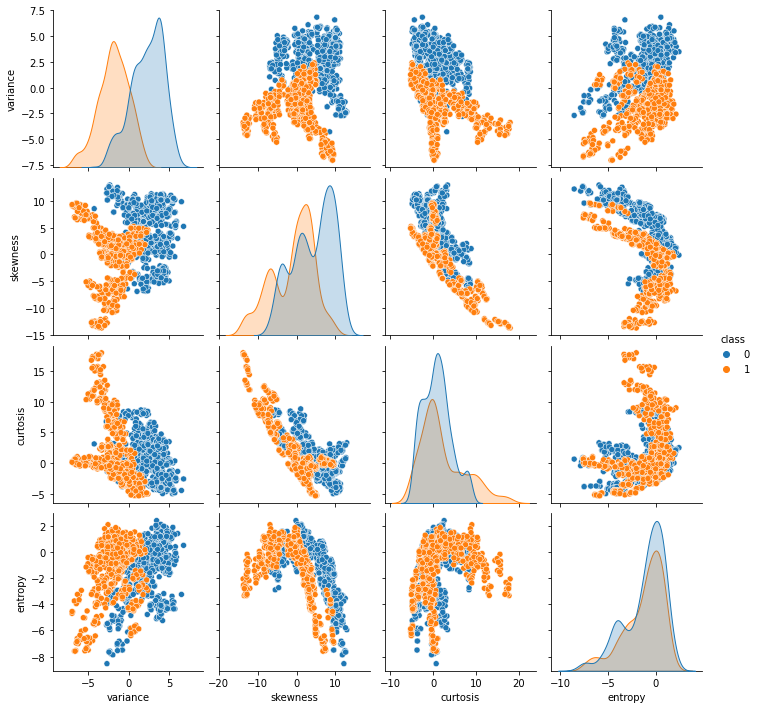

In [9]:
#Creating a pairplot differentiatied by Class

%matplotlib inline
X = bankNoteAuth[['variance', 'skewness', 'curtosis', 'entropy','class']] 
from pandas.plotting import scatter_matrix
sns.pairplot(X, hue = 'class')
plt.show() 

<AxesSubplot:>

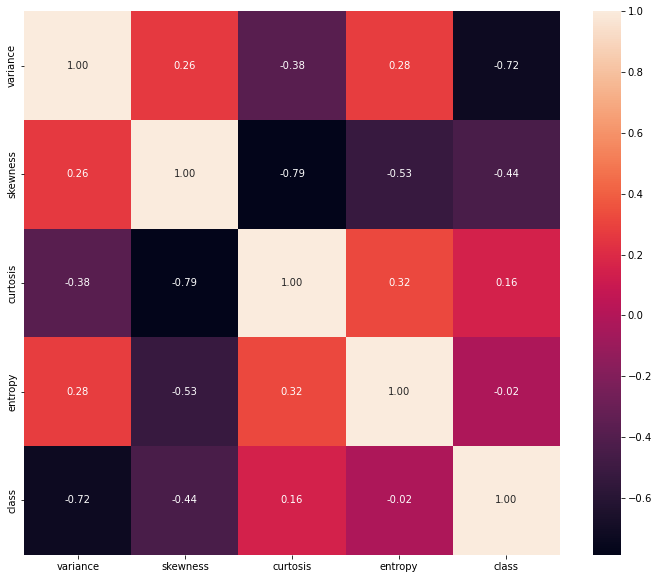

In [10]:
# Viewing Correlation coefficients using a heatmap
bankNoteAuth = pd.read_csv('data_banknote_authentication.txt')
bankNoteAuth.columns=["variance","skewness","curtosis","entropy","class"]
plt.figure(figsize=(12,10))
sns.heatmap(bankNoteAuth.corr(),annot=True,fmt='.2f')

[1.46305247]
[[-3.36564374]]


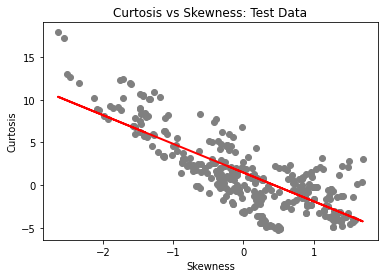

       Actual  Predicted
0     5.98900   2.170790
1    -1.32670   0.849148
2     1.32780   0.980693
3    -1.33100  -3.221606
4     0.54723  -0.908406
..        ...        ...
338  10.54050   6.301440
339   3.09460  -4.248365
340  -5.15080  -0.297517
341   4.02600   3.591162
342   5.75680   6.212135

[343 rows x 2 columns]
Mean Squared Error: 6.756478859255198
Root Mean Squared Error: 2.599322769348816
R^2: 0.6379887486744156


In [11]:
# Reshape the data using array.reshape(1, -1) if it contains a single sample with 1 column but unknown rows so use all rows.

skewness_reshape = bankNoteAuth['skewness'].values.reshape(-1,1) 
curtosis_reshape= bankNoteAuth['curtosis'].values.reshape(-1,1)

#Regression
X_train, X_test, y_train, y_test = train_test_split(skewness_reshape, curtosis_reshape, test_size=0.25, random_state=11)
regressor = LinearRegression()  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)
#Training the Regression algorithm
regressor.fit(X_train, y_train) 
 # Intercept:
print(regressor.intercept_)
# Slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)
# Create scatter plot
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.ylabel('Curtosis')
plt.xlabel('Skewness')
plt.title("Curtosis vs Skewness: Test Data")
plt.show()

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

# Mean Squared Errror and Root Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Comments
#### Looking at the historgram of all the variables. We see that the 'variance' has a normal distrubition while 'skewness' has a slight negative skew. The other two predictor variables have stronger skews, where entropy has a heavy negative skew and curtosis has a heavy positive skew. Looking at the boxplot, we see that 'curtosis' has the highest number of outliers followed by 'entropy', which are high leverage points and might negatively impact the accuracy of the prediction using those two feature variables.

#### Additionally, the 'class' variable to be predicted is balanced across the two labels, which has direct implications on the metrics that can be used for model assessment. For example, the use of the accuracy metric is valid for this application due to this balanced output variable.

#### We see from the correlation matrix that two of the predictor variables 'skewness' and 'curtosis' are highly correlated. To study this correlation, the simple linear regression model built shows that the correlation in the graph. It has an R^2 of ~64% which means that 64% of the variation in 'curtosis' can be explained by 'skewness', which goes against regression's assumption that the predictor variables are independent. This multicollinearity is expected to cause less reliable statistical inferences about the regression models' coefficients and potentially reduce the accuracy of the model.

## 3- Prepare data by using relevant preprocessing transformations, data cleaning, data standardization,dealing with null and outlier values. Divide data into test and training set.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Divide data into predictor features vector and the label of the target variable 'Risk'

X = bankNoteAuth[['variance', 'skewness', 'curtosis','entropy']] 
y = bankNoteAuth[['class']]

# Check if null values in the columns
X.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
dtype: int64

In [13]:
# Dividing data into two subsets training and test set.Training set trains the model
# X train: predictive variables in train set y train: train labels
# X test: predictive variables in test set y test test labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=11)

# Data normalization  

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1028, 4)
y_train shape: (1028, 1)
X_test shape: (343, 4)
y_test shape: (343, 1)


## 4- Fit the train data and predict test Data for the First Model and Build Confusion Matrix

In [14]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

# define models and parameters
model = LogisticRegression()
# define models and parameters
model = LogisticRegression()
solvers = ['lbfgs','sag','saga']
penalty = ['none']
# defining grid search
grid = dict(solver=solvers,penalty=penalty)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=11)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

model=LogisticRegression(**grid_result.best_params_)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)

Best: 0.991576 using {'penalty': 'none', 'solver': 'lbfgs'}
0.991576 (0.010857) with: {'penalty': 'none', 'solver': 'lbfgs'}
0.988654 (0.009078) with: {'penalty': 'none', 'solver': 'sag'}
0.989625 (0.009028) with: {'penalty': 'none', 'solver': 'saga'}
[0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1
 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1
 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0
 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1
 0 0 1 0 1 1 0 1 1 1]
              precision    recall  f1-score   suppo

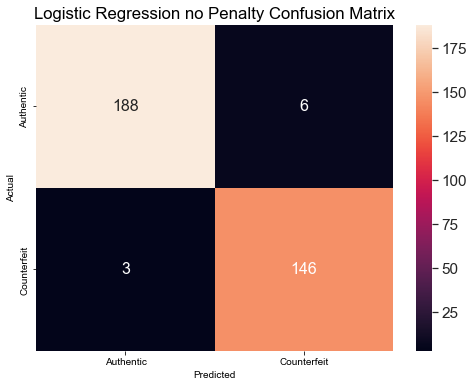

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,fmt='g',annot_kws={"size": 16},xticklabels=["Authentic","Counterfeit"], yticklabels=["Authentic","Counterfeit"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Logistic Regression no Penalty Confusion Matrix")
plt.show()

## Comment
#### The test accuracy for this model is high (97.38%) which shows that a not penalized logistic regression model without feature selection, outlier removal or optimization using techniques likes L1 or L2 or Elasticnet regularization . The goal is to use future improvements to drive accuracy higher. 

## 5- Performance Improvement Techniques


### 5-A) Logistic Regression with L2 Regularization 

In [16]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# defining grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=11)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

model=LogisticRegression(**grid_result.best_params_)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)

Best: 0.990275 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.988654 (0.009078) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.988654 (0.009078) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.988978 (0.008956) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.990275 (0.009393) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.990275 (0.009393) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.989628 (0.010626) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.982489 (0.011056) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.982489 (0.011056) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.982489 (0.011056) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.975354 (0.011157) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.975354 (0.011157) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.977622 (0.010989) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.944885 (0.023292) with

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold = KFold(n_splits=10,random_state=11, shuffle=True)
model = LogisticRegression()
results = cross_val_score(model, y_test, y_pred, cv=fold)

print(100*results.mean())

97.95798319327731


## Comment:
#### The L2 reguralization adds slight bias to the model by performing parameter shrinkage and we notice that the test accuracy improves slightly for C=100 and the same test/train split % and random state which means that the model has less overfitting and gives out better test results.  However, we notice that as the reguralization strength increases beyond that (lower C values), the performance of the model with predicting test data is reduced, as it becomes highly biased. 
####  Logistic regression works well in predicting whether the bank notes are fake or authentic for a 75-25 Test-Train Split. The Train score, CV score, and Test Score are all close which confirms that our model is not overfitting to training data, or is impacted by flawed sampling for train and test data. 

### 5-B) Ridge and Logistic Regression with L1 Regularization

In [18]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# define models and parameters
model = RidgeClassifier()

alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=11)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

model=RidgeClassifier(**grid_result.best_params_)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)


Best: 0.979574 using {'alpha': 0.1}
0.979574 (0.011035) with: {'alpha': 0.1}
0.979574 (0.011035) with: {'alpha': 0.2}
0.979574 (0.011035) with: {'alpha': 0.3}
0.979574 (0.011035) with: {'alpha': 0.4}
0.979574 (0.011035) with: {'alpha': 0.5}
0.979574 (0.011035) with: {'alpha': 0.6}
0.979574 (0.011035) with: {'alpha': 0.7}
0.979574 (0.011035) with: {'alpha': 0.8}
0.979574 (0.011035) with: {'alpha': 0.9}
0.979574 (0.011035) with: {'alpha': 1.0}
[0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1
 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1
 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0
 0 1 0 1 0 1 1 0 1 1 1 0 0 0 

In [19]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['saga']
penalty = ['l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# defining grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=11)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

model=LogisticRegression(**grid_result.best_params_)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)

Best: 0.990275 using {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.989625 (0.009028) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.990275 (0.009393) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.989628 (0.010626) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.980544 (0.011499) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.856390 (0.030009) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
[0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1
 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1
 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 

## Comments
#### Ridge and Logistic Regression with L1 reguralization were implemented to see if we get any improvement in our predictions. We notice that RidgeCalssifier performs slightly less favorably compared to Logistic Regression with No penalty and with L2 Reguralization.
#### We also see that Logistic Regression with L1 reguralization has the best test accuracy attained so far. We know that L1 can perform its coefficient elimination to reduce overfitting, which seems to help the model and has the highest tested accuracy so far

## 5-C) Performance Improvement techniques: Feature Importance

In [20]:
# feature selection

#univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = bankNoteAuth.iloc[:,0:4]  #independent columns
y = bankNoteAuth.iloc[:,-1]    #target column 

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_classif,k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print best features

      Specs        Score
0  variance  1513.864896
1  skewness   336.676646
2  curtosis    33.854046
3   entropy     0.737256


[0.49625637 0.29217133 0.14322655 0.06834575]


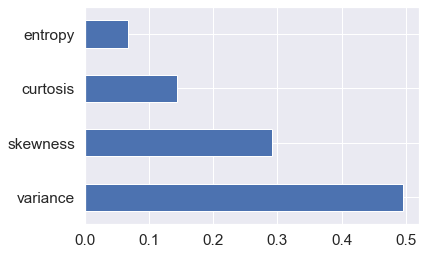

In [21]:
# feature importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

In [22]:
## Gather columns
# Divide data into predictor features vector and the label of the target variable 'class'
X = bankNoteAuth[['variance','skewness','curtosis']] 
y = bankNoteAuth[['class']]

print(X)
print(y)

# Dividing data into two subsets training and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=11)

# Data normalization  
# Data normalization  

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

# define models and parameters
model = LogisticRegression()
# define models and parameters
model = LogisticRegression()
solvers = ['saga']
penalty = ['l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# defining grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=11)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

model=LogisticRegression(**grid_result.best_params_)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)

      variance  skewness  curtosis
0      4.54590   8.16740   -2.4586
1      3.86600  -2.63830    1.9242
2      3.45660   9.52280   -4.0112
3      0.32924  -4.45520    4.5718
4      4.36840   9.67180   -3.9606
...        ...       ...       ...
1366   0.40614   1.34920   -1.4501
1367  -1.38870  -4.87730    6.4774
1368  -3.75030 -13.45860   17.5932
1369  -3.56370  -8.38270   12.3930
1370  -2.54190  -0.65804    2.6842

[1371 rows x 3 columns]
      class
0         0
1         0
2         0
3         0
4         0
...     ...
1366      1
1367      1
1368      1
1369      1
1370      1

[1371 rows x 1 columns]
Best: 0.990275 using {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.990275 (0.009393) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.990275 (0.009393) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.989628 (0.010626) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.980544 (0.011499) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.856066 (0.029977) with: {'C': 

## Comments
#### After looking at feature importance metrics, we see that the 'entropy' metric is the least important for our model. And after eliminating it, the accuracy is not impacted at all, which confirms that it was not needed and the model is capable of utilizing three feature variables vs four for prediction to attain its highest accuracy yet

## 5-D) Performance Improvement techniques: Outlier Elimination

In [23]:
# Read the data, print the shape and first 5 rows.
bankNoteAuth = pd.read_csv("data_banknote_authentication.txt")
bankNoteAuth.columns=["variance","skewness","curtosis","entropy","class"]
Q1 = bankNoteAuth['curtosis'].quantile(0.25)
Q3 = bankNoteAuth['curtosis'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

df = bankNoteAuth[~((bankNoteAuth['curtosis'] < (Q1 - 1.5 * IQR)) |(bankNoteAuth['curtosis'] > (Q3 + 1.5 * IQR)))]
print(df)
## Gather columns
# Divide data into predictor features vector and the label of the target variable 'class'
X = df[['variance','skewness','curtosis']] 
y = df[['class']]

# Dividing data into two subsets training and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=11)

# Data normalization  
# Data normalization  

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

# define models and parameters
model = LogisticRegression()
# define models and parameters
model = LogisticRegression()
solvers = ['saga']
penalty = ['l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# defining grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=11)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

model=LogisticRegression(**grid_result.best_params_)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)


      variance  skewness  curtosis  entropy  class
0      4.54590   8.16740  -2.45860 -1.46210      0
1      3.86600  -2.63830   1.92420  0.10645      0
2      3.45660   9.52280  -4.01120 -3.59440      0
3      0.32924  -4.45520   4.57180 -0.98880      0
4      4.36840   9.67180  -3.96060 -3.16250      0
...        ...       ...       ...      ...    ...
1362  -1.16670  -1.42370   2.92410  0.66119      1
1365  -2.41000   3.74330  -0.40215 -1.29530      1
1366   0.40614   1.34920  -1.45010 -0.55949      1
1367  -1.38870  -4.87730   6.47740  0.34179      1
1370  -2.54190  -0.65804   2.68420  1.19520      1

[1311 rows x 5 columns]
Best: 0.994922 using {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.993568 (0.006671) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.992888 (0.007490) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.994922 (0.006807) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.979320 (0.009967) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.844314 

## Comments
#### After eliminating the outliers in the third most important variable 'curtosis' which we found from the box and whisker plot, the test accuracy jumps to its highest yet, at 99.39% which is an improvement over the model above (98.54%) despite utilizing 60 less observations (1311 vs 1371 in original dataset). This goes to show the importance of eliminating high leverage points for logistic regression. 

## 6-Choose the best model and discuss the results.


In [24]:
train_scores=model.score(X_train,y_train)
test_scores=model.score(X_test,y_test)

print('The train score is:',train_scores*100,'%')
print('The test score is:',test_scores*100,'%')


The train score is: 99.59308240081384 %
The test score is: 99.39024390243902 %


In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold = KFold(n_splits=10,random_state=11, shuffle=True)
model = LogisticRegression()
results = cross_val_score(model, y_test, y_pred, cv=fold)

print(100*results.mean())

99.39393939393939


## Conclusion
#### Logistic Regression does a good job in predicting the authenticity of banknotes using multiple approaches such as no penalty regression, L1 and L2 reguralization Logistic Regression and RidgeClassifier. 
#### The presence of high negative correlation between 'skewness' and 'curtosis' did not seem to have an impact on the prediction accuracy since the final prediction accuracy is very close to the train score. 
#### Implementing feature selection improved the model performance by making it more efficient and did not impact test accuracy
#### Outlier elimination for 'curtosis' raised the model accuracy by about ~0.85% which is significant for a model with a high initial accuracy.
#### The best model combines all of these techniques (presented in 5-D and 6) and is the one that uses L1 reguralization with 'saga' as a solver and a C value of 100 and has an overall test accuracy of 99.39% and an identical CV score, which shows that the data is not overfit and not prone to variations due to sampling (train vs test splits) 